# Fake News Classification

#### Fake news classification is a process that involves analyzing news content to determine its truthfulness. The ultimate goal of this project is to build a reliable and efficient algorithm that can accurately classify news articles as either fake or genuine, and thus help users make informed decisions when consuming information online. In this we use different machine learning models to classify the news.



#### Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
from sklearn.metrics import accuracy_score
from joblib import dump,load

import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [3]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Inserting a column "class" as target feature

In [5]:
df_fake["class"] = 0
df_true["class"] = 1

In [6]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [7]:
# Removing last 10 rows for manual testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [8]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [9]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

In [10]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [11]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [12]:
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv",index=False)

## Merging True and Fake Dataframes

In [13]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.sample(10)

,title,text,subject,date,class
19485,HUH? GERMANS BOMBED PEARL HARBOR? Congressman ...,The video from 2012 is a little blurry but the...,left-news,"Dec 8, 2016",0
11511,WATCH: G.W. BUSH Gushes Over Kimmel’s Anti-Tru...,George W. Bush heaped praise on Jimmy Kimmel f...,politics,"Mar 3, 2017",0
2084,BREAKING: Comey Just Shut Down Trump’s Tweete...,"On Monday, while FBI Director James Comey and ...",News,"March 20, 2017",0
19855,Russia's Lavrov and Tillerson talk Syria after...,MOSCOW (Reuters) - Russia s Foreign Ministry s...,worldnews,"September 17, 2017",1
19998,Risk of Afghan civilian casualties could damp ...,KABUL (Reuters) - U.S. President Donald Trump ...,worldnews,"September 15, 2017",1
15214,Spanish court orders release on bail for Catal...,MADRID (Reuters) - A Spanish Supreme Court jud...,worldnews,"November 9, 2017",1
6366,Racist Barber Pulls Gun On Black Man Who Aske...,Racism doesn t exist anymore! The United Stat...,News,"May 15, 2016",0
185,Top U.S. Senate Democrat hopeful Congress will...,WASHINGTON (Reuters) - The top Democrat in the...,politicsNews,"December 13, 2017",1
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",0
18860,Opposition says 150 civilians killed in Russia...,AMMAN (Reuters) - Russian and Syrian jets kill...,worldnews,"September 27, 2017",1


In [14]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

## Removing columns which are not required

In [15]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [16]:
df

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21402,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,1
21403,WASHINGTON (Reuters) - The United States sugge...,1
21404,WASHINGTON (Reuters) - The United States has d...,1
21405,ISLAMABAD (Reuters) - Outlining a new strategy...,1


In [17]:
df.isnull().sum()

text     0
class    0
dtype: int64

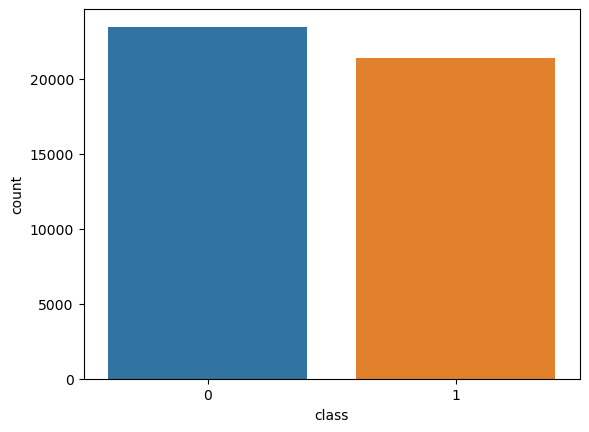

In [18]:
sns.countplot(x=df['class'])
plt.show()

## Random Shuffling the dataframe

In [19]:
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
14549,A man with stickers on his face must have been...,0
10331,WASHINGTON (Reuters) - President Barack Obama ...,1
7892,NEW YORK (Reuters) - Democratic presidential c...,1
7024,The entire southeast is on a right-wing tear w...,0
4716,WASHINGTON (Reuters) - President Donald Trump ...,1


In [21]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,A man with stickers on his face must have been...,0
1,WASHINGTON (Reuters) - President Barack Obama ...,1
2,NEW YORK (Reuters) - Democratic presidential c...,1
3,The entire southeast is on a right-wing tear w...,0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


## Creating a function to process the texts

In [24]:
def wordopt(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove digits
    text = re.sub(r'\d', '', text)
    
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    return text


In [25]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [26]:
x = df["text"]
y = df["class"]

## Splitting Training and Testing

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=123)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=123)

x_train.to_csv("Data/x_train.csv",index=False)
x_test.to_csv("Data/x_test.csv",index=False)
y_train.to_csv("Data/y_train.csv",index=False)
x_test.to_csv("Data/y_test.csv",index=False)
x_val.to_csv("Data/x_val.csv",index=False)
y_val.to_csv("Data/y_val.csv",index=False)


In [28]:
print(x_train.shape,x_test.shape,x_val.shape,y_train.shape,y_test.shape,y_val.shape)

(31414,) (6732,) (6732,) (31414,) (6732,) (6732,)


In [29]:
x_train

28698    dubai reuters  emirates and flydubai have resu...
1402     london reuters  an army bomb disposal team was...
32063    image reallife battlefield shooting range in l...
2730      trillion net wealth lost in  daysit s never a...
32964                                                     
                               ...                        
7763     abidjan reuters  at least  people have died an...
15377    fake russianhacking report is nothing but bara...
17730    she s travelling the world to promote her new ...
28030    sydney reuters  a qantas jumbo jet bound for s...
15725    king city calif reuters  on an overcast spring...
Name: text, Length: 31414, dtype: object

In [30]:
x_test

19710    on saturday green party candidate jill stein w...
44669    rep luis guti rrez ill one of the most vocal i...
27397    these  hostages must certainly feel a sense of...
3199     lusaka reuters  the emergency powers invoked b...
19738    jerusalem reuters  israeli prime minister benj...
                               ...                        
7755     st century wire says these family members made...
29729    st century wire says investigative reporter ro...
24312    tucker carlson asks robin bronk ceo of the cre...
4942     ap reportedcalifornia s elected democrats had ...
18194    the guy who wasn t funny enough to land the co...
Name: text, Length: 6732, dtype: object

## Convert text to vectors

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
dump(vectorization, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [33]:
xv_test

<6732x175104 sparse matrix of type '<class 'numpy.float64'>'
	with 1368620 stored elements in Compressed Sparse Row format>

In [34]:
df

,text,class
0,a man with stickers on his face must have been...,0
1,washington reuters president barack obama wil...,1
2,new york reuters democratic presidential cand...,1
3,the entire southeast is on a rightwing tear wi...,0
4,washington reuters president donald trump on ...,1
...,...,...
44873,,0
44874,united nationsmoscowbeirut reuters russia war...,1
44875,washington reuters president donald trumps ne...,1
44876,beirut reuters lebanese president michel aoun...,1


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)
print('train score: ',LR.score(xv_train,y_train)*100)

train score:  99.2582924810594


In [36]:
# import pickle
dump(LR,'logistic_regression.pkl')

['logistic_regression.pkl']

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
LR_accuracy= LR.score(xv_test, y_test)
print("Accuracy:", LR_accuracy*100)

Accuracy: 98.87106357694593


In [40]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3462
           1       0.98      0.99      0.99      3270

    accuracy                           0.99      6732
   macro avg       0.99      0.99      0.99      6732
weighted avg       0.99      0.99      0.99      6732



## Decision Tree Classification

In [41]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
print('train score: ',DT.score(xv_train,y_train)*100)

train score:  99.99681670592729


In [42]:
dump(DT,'DT.pkl')

['DT.pkl']

In [43]:
pred_dt = DT.predict(xv_test)

In [44]:
pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
DT_accuracy = DT.score(xv_test, y_test)
print("Accuracy:", DT_accuracy*100)

Accuracy: 99.61378490790256


In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3462
           1       1.00      1.00      1.00      3270

    accuracy                           1.00      6732
   macro avg       1.00      1.00      1.00      6732
weighted avg       1.00      1.00      1.00      6732



## Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
print('train score: ',GBC.score(xv_train,y_train)*100)

train score:  99.78990259120137


In [48]:
dump(GBC,'GBC.pkl')

['GBC.pkl']

In [49]:
pred_gbc = GBC.predict(xv_test)

In [50]:
GBC_accuracy= GBC.score(xv_test, y_test)
print("Accuracy:", GBC_accuracy*100)

Accuracy: 99.56922162804516


In [51]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3462
           1       0.99      1.00      1.00      3270

    accuracy                           1.00      6732
   macro avg       1.00      1.00      1.00      6732
weighted avg       1.00      1.00      1.00      6732



## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
print('train score: ',RFC.score(xv_train,y_train)*100)

train score:  99.99681670592729


In [53]:
dump(RFC,'RFC.pkl')

['RFC.pkl']

In [54]:
pred_rfc = RFC.predict(xv_test)

In [55]:
RFC_accuracy = RFC.score(xv_test, y_test)
print("Accuracy:", RFC_accuracy*100)

Accuracy: 98.61853832442068


In [56]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.98      0.99      0.99      3270

    accuracy                           0.99      6732
   macro avg       0.99      0.99      0.99      6732
weighted avg       0.99      0.99      0.99      6732



## test

In [57]:
from sklearn.pipeline import Pipeline
import joblib
pipeline = joblib.load("logistic_regression.pkl")
y_pred = pipeline.predict(xv_test)
print(y_pred)

[0 0 0 ... 0 0 0]


## Model Testing

In [58]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),output_lable(pred_DT[0]), 
                                                                                                              
                                                                                                        output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

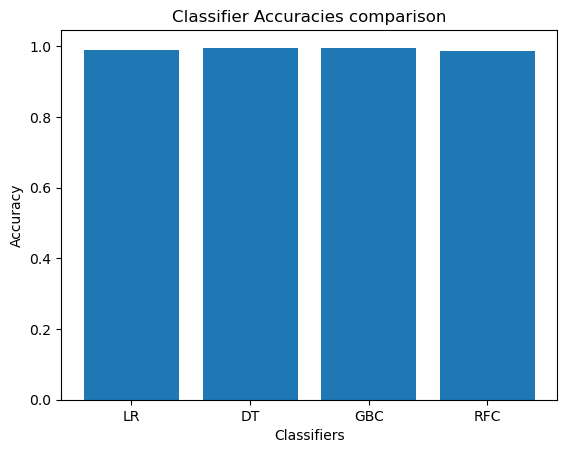

In [59]:
# Define the names of classifiers and their corresponding accuracy scores
classifiers = ['LR', 'DT', 'GBC', 'RFC']
accuracies = [LR_accuracy, DT_accuracy, GBC_accuracy, RFC_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies comparison')
plt.show()

In [66]:
news = str(input())
manual_testing(news)

 Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, 



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News


In [67]:
news = str(input())
manual_testing(news)

 LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content.  The issue of academic freedom in China hit the headlines this week after the leading British academic publisher,  Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China.  It later reversed its position.   Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database,  LexisNexis said in a statement.  In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market.  LexisNexis is owned by information group Relx. 




LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RFC Prediction: Not A Fake News
